<a href="https://colab.research.google.com/github/alexandmarkov/sberbank_reboot/blob/main/hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [5]:
array_ = np.arange(1, 101)
array_ = array_.reshape(10, 10)
array_[::2, ::2]

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [8]:
# решение с использованием numpy
%%time

seq_len = 100_000_000

def custom_mean(n):
  return np.sum(np.arange(n)) / n

print('Среднее арифметическое последовательности' 
      + ' из {} элементов: {}'.format(seq_len, custom_mean(seq_len)))

Среднее арифметическое последовательности из 100000000 элементов: 49999999.5
CPU times: user 270 ms, sys: 0 ns, total: 270 ms
Wall time: 283 ms


In [13]:
# решение без использования numpy
%%time

seq_len = 100_000_000

def custom_mean(n):
  return sum([i for i in range(n)]) / n

print('Среднее арифметическое последовательности' 
      + ' из {} элементов: {}'.format(seq_len, custom_mean(seq_len)))

Среднее арифметическое последовательности из 100000000 элементов: 49999999.5
CPU times: user 5.25 s, sys: 3.33 s, total: 8.58 s
Wall time: 8.62 s


## Задание 3 * ( необязательно к выполнению)

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [27]:
# задано изначально
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

s.sort_values().loc[s > 5].index[0]

67

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

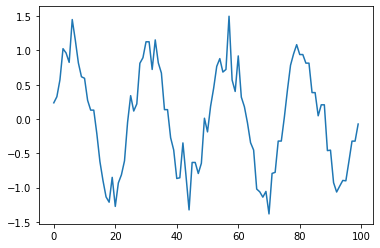

In [57]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

"""
Заполнил последним известным.
Метод ffill - как раз заполнение последним известным.
"""

df.fillna(method='ffill', inplace=True)
# отобразим
plt.plot(df.target.values)

## Задание 5 * ( необязательно к выполнению)

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [58]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

In [59]:
#старше 40
df[df['возраст']>40]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [61]:
#имеет доход выше среднего по датасету
df[df['доход']>df['доход'].mean()]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [63]:
#имеет доход выше среднего по датасету, но надежность ниже среднего по датасету
df[(df['доход']>df['доход'].mean()) 
    & (df['надежность клиента (0..1)']<df['надежность клиента (0..1)'].mean())]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


In [67]:
#важность клиента
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']

#возможная долгосрочность клиента
df['возможная долгосрочность клиента'] = df['важность клиента'] * (
    df['возраст'].mean() - df['возраст'])

In [68]:
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


# Дополнительное задание

In [297]:
from datetime import datetime
from typing import List, Dict, Set, Optional

class Phystech:
    uid = 0
    __users_last_online: Dict[int, List[datetime]] = {}
    __users_black_list: Dict[int, Set[int]] = {}
    __users_incoming_requests: Dict[int, Set[int]] = {}
    __users_outgoing_requests: Dict[int, Set[int]] = {}
    __users_friends: Dict[int, Set[int]] = {}

    def __init__(
            self,
            name: str,
            login: str,
            password: str,
            graduation_year: Optional[int] = None,
            birthday: Optional[datetime] = None,
            status: Optional[str] = None,
    ):
        self.name = name
        self.status = status
        self.__uid = Phystech.uid
        Phystech.uid += 1
        self._last_online = datetime.now()
        Phystech.__users_last_online.update({self.__uid: [self._last_online]})

        self._birthday = birthday
        self._graduation_year = graduation_year
        self.__login = login
        self.__password = password
        self.visible_friends = True
        Phystech.__users_black_list[self.__uid] = set()
        Phystech.__users_incoming_requests[self.__uid] = set()
        Phystech.__users_outgoing_requests[self.__uid] = set()
        Phystech.__users_friends[self.__uid] = set()

    def __log(self):
        self._last_online = datetime.now()
        Phystech.__users_last_online[self.__uid].append(self._last_online)
        pass

    def send_add_request(self, uid):
        """Отправить запрос на добавление в друзья"""

        """Если есть такой uid и текущий пользователь не находится в стоп листе у пользователь uid
        и текущего пользователя еще нет в друзьях и текущий пользователь не в состоянии заявки в друзья
        """
        self.__log()
        if uid < Phystech.uid \
                and uid != self.__uid\
                and self.__uid not in Phystech.__users_black_list[uid] \
                and uid not in self.friends_list\
                and uid not in self.outgoing_requests \
                and uid not in self.incoming_requests:
            Phystech.__users_incoming_requests[uid].add(self.__uid)
            Phystech.__users_outgoing_requests[self.__uid].add(uid)

    def accept_friend_request(self, uid):
        """Принять запрос на добавление в друзья"""
        self.__log()
        if uid in self.incoming_requests:
            Phystech.__users_friends[self.__uid].add(uid)
            Phystech.__users_friends[uid].add(self.__uid)
            Phystech.__users_incoming_requests[self.__uid].remove(uid)
            Phystech.__users_outgoing_requests[uid].remove(self.__uid)

    def reject_friend_request(self, uid):
        """Отклонить запрос на добавление в друзья"""
        self.__log()
        if uid in self.incoming_requests:
            Phystech.__users_incoming_requests[self.__uid].remove(uid)
            Phystech.__users_outgoing_requests[uid].remove(self.__uid)

    def remove_friend(self, uid):
        self.__log()
        """Удаление друга по uid"""
        if uid < Phystech.uid and uid != self.__uid and uid in self.friends_list:
            Phystech.__users_friends[uid].remove(self.__uid)
            Phystech.__users_friends[self.__uid].remove(uid)

    def check_outgoing_request(self, uid):
        """Проверка исходящей заявки на добавление в друзья"""
        self.__log()
        if uid < Phystech.uid and uid != self.__uid:
            if self.__uid in Phystech.__users_incoming_requests[uid]:
                return 'Ожидание добавления в друзья'
            elif self.__uid in Phystech.__users_friends[uid]:
                return 'В друзьях'
            else:
                return 'Не в друзьях'

    def add_user_to_black_list(self, uid):
        """Запрет пользователям на добавление себя в друзья"""
        self.__log()
        if uid < Phystech.uid and uid != self.__uid:
            Phystech.__users_black_list[self.__uid].add(uid)
        pass

    def friends_intersection(self, uid):
        return self.friends_list.intersection(Phystech.__users_friends[uid])

    @property
    def friends_list(self):
        return Phystech.__users_friends[self.__uid]

    @property
    def is_graduate(self) -> Optional[bool]:
        """Есть ли образование"""
        if self._graduation_year is not None:
            return datetime.now().year - self._graduation_year > 0
        return None

    @property
    def __black_list(self):
        return Phystech.__users_black_list[self.__uid]

    @property
    def incoming_requests(self):
        return Phystech.__users_incoming_requests[self.__uid]

    @property
    def outgoing_requests(self):
        return Phystech.__users_outgoing_requests[self.__uid]

    @property
    def last_online(self):
        return self._last_online

    def __str__(self) -> str:
        str_repr_lines = [
            f'НаФизтехе. Пользователь \"{self.name}\".',
            'День рождения: {}'.format(
                self._birthday if self._birthday is not None else '(скрыт)'
            ),
            f'Статус: \"{self.status}\".',
            f'Последний раз был онлайн {self.last_online}'
        ]
        if self.is_graduate is not None:
            if self.is_graduate:
                str_repr_lines.append(
                    f'Выпускник {self._graduation_year} года'
                )
        return '\n'.join(str_repr_lines)

    def __repr__(self) -> str:
        return '\n'.join([
            f'uid:\t{self.__uid}',
            f'last_online:\t{self.last_online}',
        ])

In [291]:
import random
import string

Сгенерируем юзеров

In [298]:
social_network = []
for i in range(20):
  social_network.append(
      Phystech(
          name = ''.join(random.choices(string.ascii_uppercase, k=random.randint(6, 15)))\
          +' '+''.join(random.choices(string.ascii_uppercase, k=random.randint(6, 15)))\
          +' '+''.join(random.choices(string.ascii_uppercase, k=random.randint(6, 15))),

          login = ''.join(random.choices(string.ascii_uppercase, k=random.randint(6, 15))),

          password = ''.join(random.choices(string.ascii_uppercase, k=random.randint(6, 15))),

          birthday=datetime(year=random.randint(1950, 2000)
                            , month=random.randint(1, 12)
                            , day=random.randint(1, 28))
      )
  )

Промоделируем взаимодействие

In [299]:
for i in range(2000):
  social_network[random.randint(0, 19)].send_add_request(random.randint(0, 19))
for i in range(2000):
  social_network[random.randint(0, 19)].accept_friend_request(random.randint(0, 19))
for i in range(50):
  social_network[random.randint(0, 19)].remove_friend(random.randint(0, 19))

Попробуем визуализировать граф нашей социальной сети. Думаю, что получится не очень)

In [308]:
from graphviz import Digraph
dot = Digraph(comment='VIP graph')

In [309]:
data = {'Source': [social_network[i].name for i in range(Phystech.uid)],
        'last_online': [i.last_online for i in social_network],
        'Target': [list(i.friends_list) for i in social_network]}
df = pd.DataFrame.from_dict(data)

In [310]:
df = df.explode('Target').reset_index(drop=True)
df['Target'] = df['Target'].map(lambda x: social_network[int(x)].name)

In [311]:
nodes_G = []
for node in df['Source']:
    if node not in nodes_G:
        nodes_G.append(node)
for node in df['Target']:
    if node not in nodes_G:
        nodes_G.append(node)

In [312]:
dot = Digraph(comment='VIP graph')
for i in range(len(nodes_G)):
    dot.node(nodes_G[i])
for i in range(len(df)):
    edge = df.iloc[i]
    dot.edge(edge['Source'], edge['Target'])

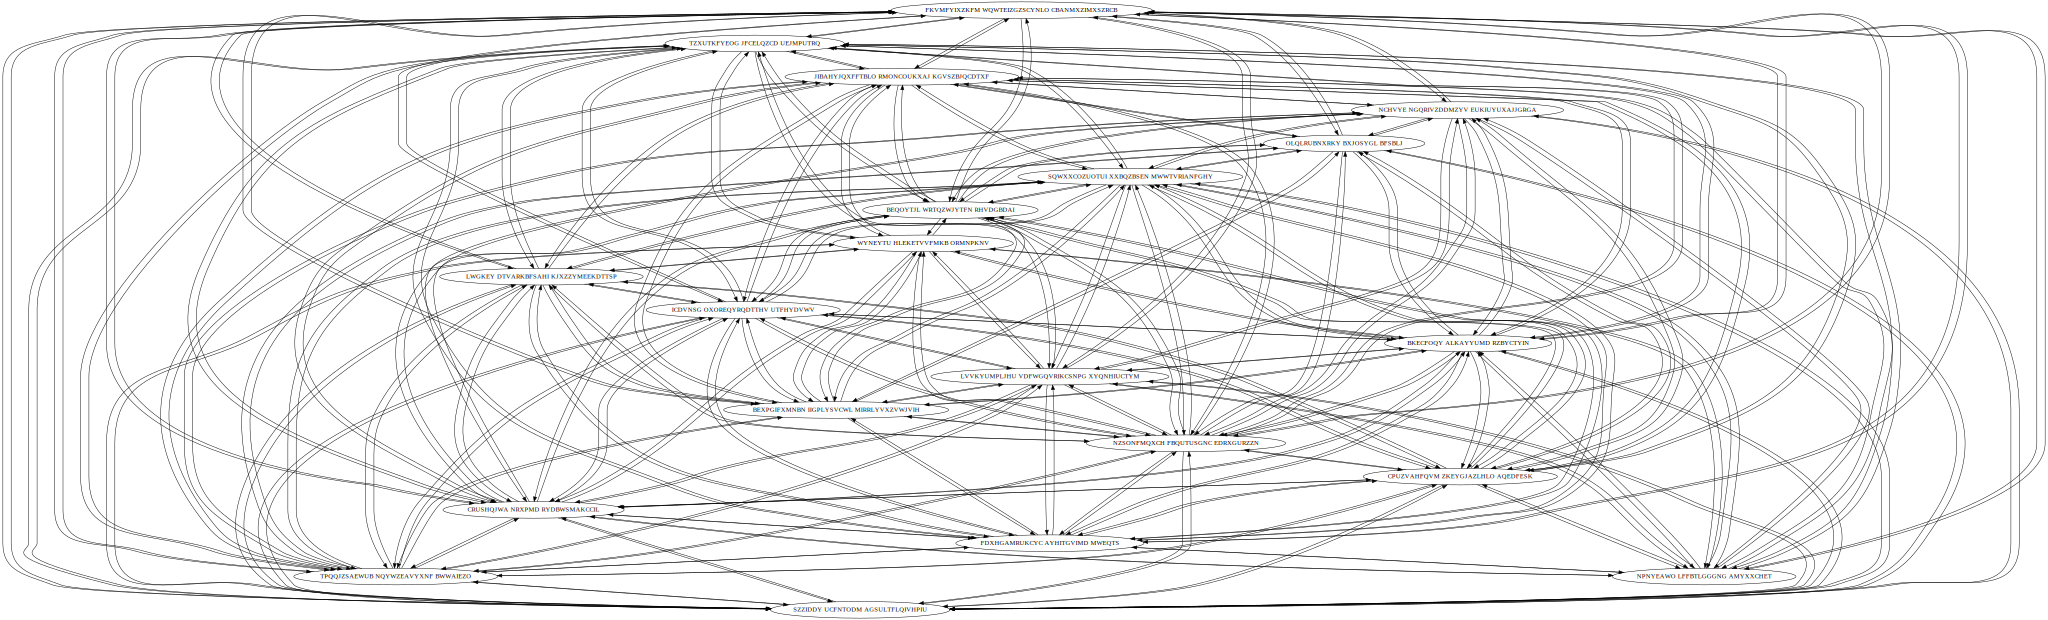

In [313]:
dot

Дальше по заданию

In [334]:
data = {'uid': [i for i in range(Phystech.uid)],
        'last_online': [i.last_online for i in social_network]}
df = pd.DataFrame.from_dict(data)

for i in range(Phystech.uid):
  df[str(i)] = [len(social_network[i].friends_intersection(j)) if i!=j 
                else 0 for j in range(Phystech.uid)]

In [335]:
df['last_online_'] = df['last_online'].map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f'))

In [316]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Не совсем понял, что дает нам line plot по данным о том, когда пользователи были онлайн. Построил scatterplot, так как не совсем корректно строить lineplot по uid и last_online

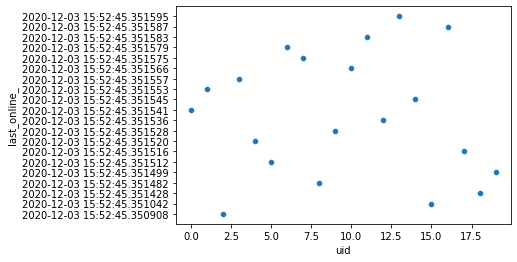

In [344]:
sns.scatterplot(x='uid', y='last_online_', data=df.sort_values(by='last_online', ascending=False))

Построим heatmap по кол-ву общих друзей

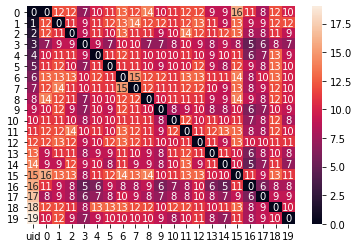

In [347]:
sns.heatmap(data=df.drop(columns=['last_online', 'last_online_']), annot=True)